In [1]:
import numpy as np
import pickle
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import os
import matplotlib.pyplot as plt
import cv2

def encode_img(path):
    model=load_model("model_weights/model_00.h5")
    img=image.load_img(path,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.array(img)
    img=np.expand_dims(img,axis=0)
#     print(img)
    img=preprocess_input(img)
#     print(">>>>>>>>>>>>>>")
#     print(img)
    features=model.predict(img)
    features=features.reshape(-1,)
    return features

def predict_cap(photo):
    with open("index2word.pkl","rb") as f:
        idx_to_word=pickle.load(f)
    with open("word2index.pkl","rb") as f:
        word_to_idx=pickle.load(f)
    loaded_model = load_model('model_weights/model_29.h5')
    in_txt="startseq"
    for i in range(35):
        sequence=[word_to_idx[w] for w in in_txt.split() if w in word_to_idx]
#         print(sequence)
        seq=pad_sequences([sequence],maxlen=35,value=0,padding='post')
#         print(seq)
#         print(seq.shape,photo.shape)
        y_pred=loaded_model.predict([photo,seq])
        y_pred=y_pred.argmax()
        word=idx_to_word[y_pred]
        in_txt+=' '+word

        if word=='endseq':
            break
            
    final_cap=in_txt.split()[1:-1]
    final_cap=' '.join(final_cap)

    return final_cap

def get_caption(path):
    encoded_test=encode_img(path)
    photo=encoded_test.reshape(1,2048)
    caption=predict_cap(photo)
    return caption


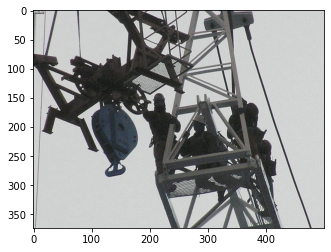

they are suspended in the air


In [2]:
cap=get_caption("flickr30k_images/flickr30k_images/10002456.jpg")
img=cv2.imread("flickr30k_images/flickr30k_images/10002456.jpg")
plt.imshow(img)
plt.show()
print(cap)